# Import libraries and words from journalist from Murcia - Spain 

On this exercise a Word Cloud is created to analyze words on wikipedia sites for all journalist from Murcia - Spain.

In [34]:
import requests
from bs4 import BeautifulSoup



texto_html = requests.get('https://es.wikipedia.org/wiki/Categor%C3%ADa:Periodistas_de_la_Regi%C3%B3n_de_Murcia').text
soup = BeautifulSoup(texto_html, 'html.parser')

link_list = []
for i in soup.find_all('a', href=True):
    link_list.append("https://es.wikipedia.org" + i['href'])



In [35]:
link_list = [
    link for link in link_list if all(
        keyword not in link for keyword in [
            "orghttp", "w/index", "wiki/Catego", "wiki/Archivo", "wiki/Portal",
            "wiki/Especial", "org//", "wiki/Wikipedia", "body", "wiki/Ayuda"
        ]
    )
]
link_list

['https://es.wikipedia.org/wiki/Joaqu%C3%ADn_Arder%C3%ADus',
 'https://es.wikipedia.org/wiki/Federico_Balart',
 'https://es.wikipedia.org/wiki/Jos%C3%A9_Ballester_Nicol%C3%A1s',
 'https://es.wikipedia.org/wiki/Andr%C3%A9s_Blanco_y_Garc%C3%ADa',
 'https://es.wikipedia.org/wiki/Jaime_Campmany',
 'https://es.wikipedia.org/wiki/Pancracio_Celdr%C3%A1n',
 'https://es.wikipedia.org/wiki/Teodoro_Delgado_Pomata',
 'https://es.wikipedia.org/wiki/Miguel_Fern%C3%A1ndez_Pe%C3%B1aflor',
 'https://es.wikipedia.org/wiki/Jos%C3%A9_Ferr%C3%A1ndiz_y_Ruiz',
 'https://es.wikipedia.org/wiki/Juan_Guerrero_Ruiz',
 'https://es.wikipedia.org/wiki/Natalia_Hern%C3%A1ndez_Rojo',
 'https://es.wikipedia.org/wiki/Pedro_Jara_Carrillo',
 'https://es.wikipedia.org/wiki/Mona_Le%C3%B3n_Siminiani',
 'https://es.wikipedia.org/wiki/Jos%C3%A9_Mart%C3%ADnez_Tornel',
 'https://es.wikipedia.org/wiki/Alfonso_Merlos',
 'https://es.wikipedia.org/wiki/Jos%C3%A9_%C3%81ngel_Monta%C3%B1%C3%A9s_Berm%C3%BAdez',
 'https://es.wikipedia.org

In [36]:
text_data = []
for i in link_list:
    texto_html = requests.get(i).text
    soup = BeautifulSoup(texto_html, 'html.parser')
    print(i)
    for j in soup.find_all('p'):
        text_data.append(j.getText())


https://es.wikipedia.org/wiki/Joaqu%C3%ADn_Arder%C3%ADus
https://es.wikipedia.org/wiki/Federico_Balart
https://es.wikipedia.org/wiki/Jos%C3%A9_Ballester_Nicol%C3%A1s
https://es.wikipedia.org/wiki/Andr%C3%A9s_Blanco_y_Garc%C3%ADa
https://es.wikipedia.org/wiki/Jaime_Campmany
https://es.wikipedia.org/wiki/Pancracio_Celdr%C3%A1n
https://es.wikipedia.org/wiki/Teodoro_Delgado_Pomata
https://es.wikipedia.org/wiki/Miguel_Fern%C3%A1ndez_Pe%C3%B1aflor
https://es.wikipedia.org/wiki/Jos%C3%A9_Ferr%C3%A1ndiz_y_Ruiz
https://es.wikipedia.org/wiki/Juan_Guerrero_Ruiz
https://es.wikipedia.org/wiki/Natalia_Hern%C3%A1ndez_Rojo
https://es.wikipedia.org/wiki/Pedro_Jara_Carrillo
https://es.wikipedia.org/wiki/Mona_Le%C3%B3n_Siminiani
https://es.wikipedia.org/wiki/Jos%C3%A9_Mart%C3%ADnez_Tornel
https://es.wikipedia.org/wiki/Alfonso_Merlos
https://es.wikipedia.org/wiki/Jos%C3%A9_%C3%81ngel_Monta%C3%B1%C3%A9s_Berm%C3%BAdez
https://es.wikipedia.org/wiki/Nicol%C3%A1s_Ortega_Pag%C3%A1n
https://es.wikipedia.org/wiki

In [37]:
import re

lista_de_palabras = re.sub("[^\w]", " ",  " ".join(text_data)).split()


# Delete stopwords from Spanish language

In [38]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords_spanish = stopwords.words('spanish')


numbers = [str(number) for number in range(100)]
lista_de_palabras = [word for word in lista_de_palabras if word.lower() not in stopwords_spanish]
lista_de_palabras = [word for word in lista_de_palabras if word.lower() not in numbers]

[nltk_data] Downloading package stopwords to /home/juanes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
from collections import Counter
import pandas as pd

top = Counter(lista_de_palabras).most_common(1000)

df = pd.DataFrame(top, columns = ['word', 'freq'])

# Word Analysis

How many words it have?

In [40]:
print(f' On Wikipedia sites {df.word.count()}')

 On Wikipedia sites 1000


Which is the most used word?

In [41]:
max_freq_word = df.loc[df['freq'].idxmax(), 'word']
max_freq_word


'Murcia'

What is the frequency for the most common word?

In [42]:
most_common_freq = df.loc[df['freq'].idxmax(), 'freq']
most_common_freq

133

# Word Cloud drawing

In [43]:
from wordcloud import WordCloud
wc_genesis = WordCloud(max_font_size=50, max_words=100, background_color="white")
wordcloud_draw = wc_genesis.generate_from_frequencies(df.set_index('word').to_dict()['freq'])

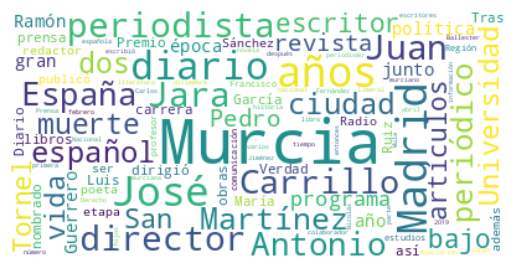

In [44]:
import matplotlib.pyplot as plt

wordcloud_draw.to_file("img/wordcloud.png")
plt.imshow(wordcloud_draw, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
import numpy as np
from PIL import Image
mask = np.array(Image.open("img/murcia.jpg"))
mask_bw = Image.fromarray(mask).convert('L')
mask_bw_array = np.array(mask_bw)
mask_bw_array
mask_bw_array[mask_bw_array != 255] = 0
mask_bw_array = np.where(mask_bw_array == 255, 0, np.where(mask_bw_array == 0, 255, mask_bw_array))

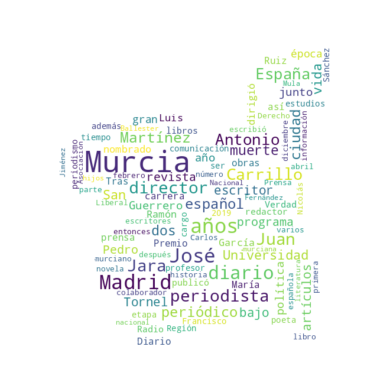

In [46]:
wc_genesis = WordCloud(
    max_font_size=50, 
    max_words=100, background_color="white", mask=mask_bw_array, contour_width=5,
    contour_color='white')
wordcloud_draw = wc_genesis.generate_from_frequencies(df.set_index('word')['freq'].to_dict())
wordcloud_draw.to_file("img/wordcloud_mask.png")
plt.imshow(wordcloud_draw, interpolation='bilinear')
plt.axis("off")
plt.show()


# other visualization tools

On this section I use Flourish to plot a bubble plot 

In [47]:
df.to_csv